In [1]:
import os
import numpy as np
import pandas as pd
from config import DATASET_DIR, remove_classes

train_folder = os.path.join(DATASET_DIR, "TRAIN")
test_folder = os.path.join(DATASET_DIR, "TEST")
train_labels = pd.read_csv(os.path.join(DATASET_DIR, "train_labels.csv"))
test_labels = pd.read_csv(os.path.join(DATASET_DIR, "test_labels.csv"))

cls_ = set(train_labels["class"]) - set(remove_classes)

train_labels = train_labels[train_labels["class"].isin(cls_)]
test_labels = test_labels[test_labels["class"].isin(cls_)]

print(len(os.listdir(train_folder)), len(os.listdir(test_folder)))
print(train_labels.shape, test_labels.shape)
print(len(train_labels.filename.unique()), len(test_labels.filename.unique()))

4720 476
(8139, 8) (430, 8)
2119 214


In [2]:
from helper_functions import add_coco_annot

train_labels = add_coco_annot(train_labels)
test_labels = add_coco_annot(test_labels)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'Cherry leaf'),
  Text(1, 0, 'Peach leaf'),
  Text(2, 0, 'Corn leaf blight'),
  Text(3, 0, 'Apple rust leaf'),
  Text(4, 0, 'Potato leaf late blight'),
  Text(5, 0, 'Strawberry leaf'),
  Text(6, 0, 'Tomato leaf late blight'),
  Text(7, 0, 'Tomato mold leaf'),
  Text(8, 0, 'Potato leaf early blight'),
  Text(9, 0, 'Apple leaf'),
  Text(10, 0, 'Tomato leaf yellow virus'),
  Text(11, 0, 'Blueberry leaf'),
  Text(12, 0, 'Tomato leaf mosaic virus'),
  Text(13, 0, 'Raspberry leaf'),
  Text(14, 0, 'Tomato leaf bacterial spot'),
  Text(15, 0, 'Squash Powdery mildew leaf'),
  Text(16, 0, 'grape leaf'),
  Text(17, 0, 'Tomato Early blight leaf'),
  Text(18, 0, 'Apple Scab Leaf'),
  Text(19, 0, 'Tomato Septoria leaf spot'),
  Text(20, 0, 'Tomato leaf'),
  Text(21, 0, 'Soyabean leaf'),
  Text(22, 0, 'Bell_pepper leaf spot'),
  Text(23, 0, 'Bell_pepper l

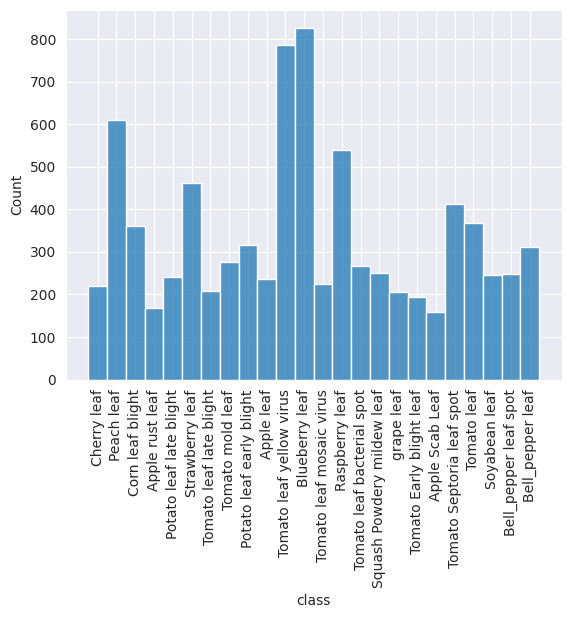

In [3]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.histplot(train_labels["class"])
plt.xticks(rotation=90)

In [ ]:
from PIL import Image

filename = "dsc_8151s.jpg"
img = Image.open(train_folder + f"/{filename}")
img = img.convert("RGB")

img

In [ ]:
from helper_functions import draw_bbox

annotations = train_labels[train_labels.filename==filename][['class', 'xmin', 'ymin', 'width', 'height']]
img = draw_bbox(img, annotations.values.tolist())

img

In [8]:
train_labels[train_labels.filename=="powdery-mildew-on-squash-leaves.jpg"]

image_id                             filename  image_height  \
8269      2060  powdery-mildew-on-squash-leaves.jpg           454   
8270      2060  powdery-mildew-on-squash-leaves.jpg           454   
8271      2060  powdery-mildew-on-squash-leaves.jpg           454   

      image_width                       class  class_label  xmin  ymin  width  \
8269          680  Squash Powdery mildew leaf           15   323    57    357   
8270          680  Squash Powdery mildew leaf           15     7     1    317   
8271          680  Squash Powdery mildew leaf           15    77   170    270   

      height  
8269     385  
8270     262  
8271     284

In [7]:
train_labels[train_labels.image_id==2057]

image_id                       filename  image_height  image_width  \
8257      2057  1058_0.jpeg?itok=OQkdtxgv.jpg           600          800   
8258      2057  1058_0.jpeg?itok=OQkdtxgv.jpg           600          800   

                         class  class_label  xmin  ymin  width  height  
8257  Tomato Early blight leaf           17   208    26    155      76  
8258  Tomato Early blight leaf           17     1   183    799     412

In [87]:
from datasets import Dataset, Image

filenames = ['cherry-tree-leaves-and-fruits.jpg', 'peach-and-leaf-stock-image-2809275.jpg', 'foodjuly2011+026.jpg', 'applerust-500x383.jpg']

image_ids, images, widths, heights, objects, categories = [], [], [], [], [], []
for filename in filenames:
    image_id = train_labels[train_labels.filename==filename]["image_id"].values[0]
    image = train_folder + f"/{filename}"
    width = train_labels[train_labels.filename==filename]["image_width"].values[0]
    height = train_labels[train_labels.filename==filename]["image_height"].values[0]
    
    areas = np.array(train_labels[train_labels.filename==filename]['width'] * train_labels[train_labels.filename==filename]['height']).tolist()
    bboxes = train_labels[train_labels.filename==filename][['xmin', 'ymin', 'width', 'height']].values.tolist()
    category = train_labels[train_labels.filename==filename]['class_label'].values.tolist()
    object = {'area': areas, 'bbox': bboxes, 'category': category}
    
    image_ids.append(image_id)
    images.append(image)
    widths.append(width)
    heights.append(height)
    objects.append(object)
    
dummy_ds = Dataset.from_dict({"image_id": image_ids, "image": images, "width": widths, "height": heights, "objects": objects})
dummy_ds = dummy_ds.cast_column("image", Image())

In [94]:
from transformers import AutoImageProcessor

checkpoint = "facebook/detr-resnet-50"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [114]:
from datasets import DatasetDict

In [116]:
dummy_ds2 = DatasetDict({"train": Dataset.from_dict({"image_id": image_ids, "image": images, "width": widths, "height": heights, "objects": objects}),
             "test": Dataset.from_dict({"image_id": image_ids, "image": images, "width": widths, "height": heights, "objects": objects}),
             })

In [129]:
train_labels[train_labels.filename.isin(['tomato-early-blight-1'])

Empty DataFrame
Columns: [image_id, filename, image_height, image_width, class, class_label, xmin, ymin, width, height]
Index: []

In [130]:
train_labels

image_id                                filename  image_height  \
0            0       cherry-tree-leaves-and-fruits.jpg           300   
1            0       cherry-tree-leaves-and-fruits.jpg           300   
2            0       cherry-tree-leaves-and-fruits.jpg           300   
3            0       cherry-tree-leaves-and-fruits.jpg           300   
4            1  peach-and-leaf-stock-image-2809275.jpg          1099   
...        ...                                     ...           ...   
8464      2116     pddl-highlights-fig-1-bact-spot.jpg          1000   
8465      2116     pddl-highlights-fig-1-bact-spot.jpg          1000   
8466      2116     pddl-highlights-fig-1-bact-spot.jpg          1000   
8467      2117         bacterialLeafSpot07-2jqdlmz.jpg          3000   
8468      2118           2159_0.jpeg?itok=eBFRbolm.jpg           385   

      image_width                       class  class_label  xmin  ymin  width  \
0             350                 Cherry leaf            0   198    77    101   
1             350                 Cherry leaf            0     3   114    145   
2             350                 Cherry leaf            0    30   184    159   
3             350                 Cherry leaf            0   226     4    120   
4            1300                  Peach leaf            1   237   479    290   
...           ...                         ...          ...   ...   ...    ...   
8464         1500  Tomato leaf bacterial spot           14    17   204    254   
8465         1500  Tomato leaf bacterial spot           14   279   180    180   
8466         1500  Tomato leaf bacterial spot           14   588   267    343   
8467         4000  Tomato leaf bacterial spot           14  1065   512   1907   
8468          256            Corn leaf blight            2    39     1    169   

      height  
0        175  
1        121  
2        113  
3         79  
4        331  
...      ...  
8464     229  
8465     309  
8466     473  
8467    1645  
8468     367  

[8139 rows x 10 columns]

In [29]:
import albumentations
import numpy as np
import torch

transform = albumentations.Compose(
    [
        albumentations.Resize(480, 480),
        albumentations.HorizontalFlip(p=1.0),
        albumentations.RandomBrightnessContrast(p=1.0),
    ],
    bbox_params=albumentations.BboxParams(format="coco", label_fields=["category"]),
)

[[932, 352, 164, 203],
 [455, 107, 172, 238],
 [577, 326, 186, 215],
 [364, 504, 265, 99],
 [224, 567, 235, 210],
 [65, 756, 277, 289],
 [467, 728, 238, 322],
 [643, 590, 253, 141],
 [923, 519, 369, 308],
 [918, 678, 206, 271]]

In [48]:
for i in range(max(train_labels.image_id.values)):
    try:
        opt = transform(image=np.array(Image.open(train_folder + "/" + train_labels[train_labels.image_id==i]["filename"].values[0])), 
                    bboxes=train_labels[train_labels.image_id==i][['xmin', 'ymin', 'width', 'height']].values.tolist(), 
                    category=train_labels[train_labels.image_id==i]["class_label"].values.tolist())
    except FileNotFoundError:
        pass
    except:
        print(train_labels[train_labels.image_id==i]["filename"].values[0])

IMG_1526.jpg
Early-blight.jpg
tomato_plants_1_original.JPG?1407178095.jpg
IMG_2348.jpg
tomato-septoria-3.jpg


In [50]:
for i in range(max(test_labels.image_id.values)):
    try:
        opt = transform(image=np.array(Image.open(test_folder + "/" + test_labels[test_labels.image_id==i]["filename"].values[0])), 
                    bboxes=test_labels[test_labels.image_id==i][['xmin', 'ymin', 'width', 'height']].values.tolist(), 
                    category=test_labels[test_labels.image_id==i]["class_label"].values.tolist())
    except FileNotFoundError:
        pass
    except:
        print(test_labels[test_labels.image_id==i]["filename"].values[0])

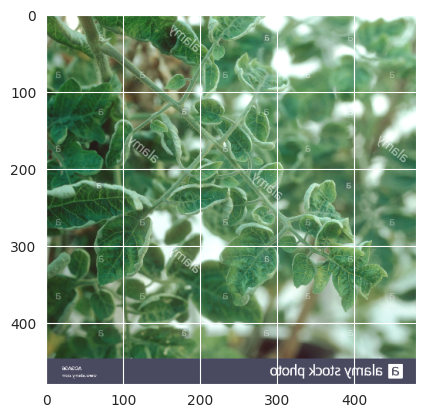

In [43]:
plt.imshow(opt["image"])#.shape

In [89]:
def formatted_anns(image_id, category, area, bbox):
    annotations = []
    for i in range(0, len(category)):
        new_ann = {
            "image_id": image_id,
            "category_id": category[i],
            "isCrowd": 0,
            "area": area[i],
            "bbox": list(bbox[i]),
        }
        annotations.append(new_ann)

    return annotations

In [90]:
# transforming a batch
def transform_aug_ann(examples):
    image_ids = examples["image_id"]
    images, bboxes, area, categories = [], [], [], []
    for image, objects in zip(examples["image"], examples["objects"]):
        image = np.array(image.convert("RGB"))[:, :, ::-1]
        out = transform(image=image, bboxes=objects["bbox"], category=objects["category"])

        area.append(objects["area"])
        images.append(out["image"])
        bboxes.append(out["bboxes"])
        categories.append(out["category"])

    targets = [
        {"image_id": id_, "annotations": formatted_anns(id_, cat_, ar_, box_)}
        for id_, cat_, ar_, box_ in zip(image_ids, categories, area, bboxes)
    ]

    return image_processor(images=images, annotations=targets, return_tensors="pt")

In [95]:
dummy_ds = dummy_ds.map(transform_aug_ann, batched=True, batch_size=2)

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

{'image_id': [0, 1], 'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=350x300 at 0x7F03E67BB100>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1300x1099 at 0x7F03868DFA60>], 'width': [350, 1300], 'height': [300, 1099], 'objects': [{'area': [17675, 17545, 17967, 9480], 'bbox': [[198, 77, 101, 175], [3, 114, 145, 121], [30, 184, 159, 113], [226, 4, 120, 79]], 'category': [0, 0, 0, 0]}, {'area': [95990, 187680, 109292, 124584], 'bbox': [[237, 479, 290, 331], [105, 520, 480, 391], [344, 106, 307, 356], [724, 106, 179, 696]], 'category': [1, 1, 1, 1]}]}
[{'image_id': 0, 'annotations': [{'image_id': 0, 'category_id': 0, 'isCrowd': 0, 'area': 17675, 'bbox': [69.94285714285712, 123.19999999999999, 138.51428571428573, 280.0]}, {'image_id': 0, 'category_id': 0, 'isCrowd': 0, 'area': 17545, 'bbox': [277.02857142857147, 182.4, 198.85714285714283, 193.6]}, {'image_id': 0, 'category_id': 0, 'isCrowd': 0, 'area': 17967, 'bbox': [220.79999999999998, 294.4, 218.05714285714285,

In [122]:
dummy_ds2 = dummy_ds2.with_transform(transform_aug_ann)

In [123]:
dummy_ds2

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 4
    })
    test: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects'],
        num_rows: 4
    })
})

In [ ]:
{'image_id': 15,
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=943x663 at 0x7F9EC9E77C10>,
 'width': 943,
 'height': 663,
 'objects': {'id': [114, 115, 116, 117],
  'area': [3796, 1596, 152768, 81002],
  'bbox': [[302.0, 109.0, 73.0, 52.0],
   [810.0, 100.0, 57.0, 28.0],
   [160.0, 31.0, 248.0, 616.0],
   [741.0, 68.0, 202.0, 401.0]],
  'category': [4, 4, 0, 0]}}

<Axes: xlabel='image_height', ylabel='Count'>

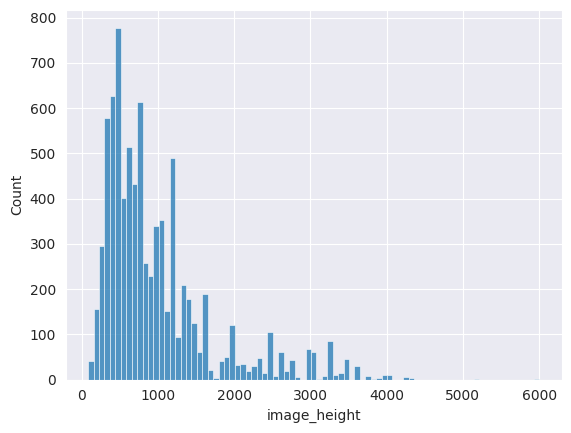

In [13]:
sn.histplot(train_labels["image_height"])

In [12]:
train_labels["image_height"].max(), train_labels["image_height"].min()

(6000, 85)

In [3]:
from datasets import load_dataset

ds = load_dataset("susnato/plant_disease_detection_processed")

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

In [ ]:
ds['train'][0]

In [6]:
ds['train'].features['objects']['category']

Sequence(feature=Value(dtype='int64', id=None), length=-1, id=None)

In [46]:
ds['train']

Dataset({
    features: ['image_id', 'image', 'width', 'height', 'objects', 'pixel_values', 'pixel_mask', 'labels'],
    num_rows: 2110
})

In [45]:
import numpy as np
np.array(ds['train'][0]['pixel_values']).shape

(3, 800, 800)

In [35]:
import os
import pandas as pd
from config import DATASET_DIR, remove_classes
from helper_functions import rename_files, add_coco_annot

train_labels2 = pd.read_csv(os.path.join(DATASET_DIR, "train_labels.csv"))
test_labels2 = pd.read_csv(os.path.join(DATASET_DIR, "test_labels.csv"))

train_labels2 = rename_files(train_labels2)
test_labels2 = rename_files(test_labels2)

cls_ = set(train_labels2["class"]) - set(remove_classes)

train_labels2 = train_labels2[train_labels2["class"].isin(cls_)]
test_labels2 = test_labels2[test_labels2["class"].isin(cls_)]

train_labels2 = add_coco_annot(train_labels2)
test_labels2 = add_coco_annot(test_labels2)

{'Cherry leaf': 0, 'Peach leaf': 1, 'Corn leaf blight': 2, 'Apple rust leaf': 3, 'Potato leaf late blight': 4, 'Strawberry leaf': 5, 'Tomato leaf late blight': 6, 'Tomato mold leaf': 7, 'Potato leaf early blight': 8, 'Apple leaf': 9, 'Tomato leaf yellow virus': 10, 'Blueberry leaf': 11, 'Tomato leaf mosaic virus': 12, 'Raspberry leaf': 13, 'Tomato leaf bacterial spot': 14, 'Squash Powdery mildew leaf': 15, 'grape leaf': 16, 'Tomato Early blight leaf': 17, 'Apple Scab Leaf': 18, 'Tomato Septoria leaf spot': 19, 'Tomato leaf': 20, 'Soyabean leaf': 21, 'Bell_pepper leaf spot': 22, 'Bell_pepper leaf': 23}
{'Cherry leaf': 0, 'Peach leaf': 1, 'Corn leaf blight': 2, 'Apple rust leaf': 3, 'Potato leaf late blight': 4, 'Strawberry leaf': 5, 'Tomato leaf late blight': 6, 'Tomato mold leaf': 7, 'Potato leaf early blight': 8, 'Apple leaf': 9, 'Tomato leaf yellow virus': 10, 'Blueberry leaf': 11, 'Tomato leaf mosaic virus': 12, 'Raspberry leaf': 13, 'Tomato leaf bacterial spot': 14, 'Squash Powdery

In [36]:
traind = train_labels2[["class", "class_label"]].drop_duplicates()
testd = train_labels2[["class", "class_label"]].drop_duplicates()

In [34]:
traind.values

array([['Cherry leaf', 0],
       ['Peach leaf', 1],
       ['Corn leaf blight', 2],
       ['Apple rust leaf', 3],
       ['Potato leaf late blight', 4],
       ['Strawberry leaf', 5],
       ['Tomato leaf late blight', 6],
       ['Tomato mold leaf', 7],
       ['Potato leaf early blight', 8],
       ['Apple leaf', 9],
       ['Tomato leaf yellow virus', 10],
       ['Blueberry leaf', 11],
       ['Tomato leaf mosaic virus', 12],
       ['Raspberry leaf', 13],
       ['Tomato leaf bacterial spot', 14],
       ['Squash Powdery mildew leaf', 15],
       ['grape leaf', 16],
       ['Tomato Early blight leaf', 17],
       ['Apple Scab Leaf', 18],
       ['Tomato Septoria leaf spot', 19],
       ['Tomato leaf', 20],
       ['Soyabean leaf', 21],
       ['Bell_pepper leaf spot', 22],
       ['Bell_pepper leaf', 23]], dtype=object)

In [37]:
testd.values

array([['Cherry leaf', 0],
       ['Peach leaf', 1],
       ['Corn leaf blight', 2],
       ['Apple rust leaf', 3],
       ['Potato leaf late blight', 4],
       ['Strawberry leaf', 5],
       ['Tomato leaf late blight', 6],
       ['Tomato mold leaf', 7],
       ['Potato leaf early blight', 8],
       ['Apple leaf', 9],
       ['Tomato leaf yellow virus', 10],
       ['Blueberry leaf', 11],
       ['Tomato leaf mosaic virus', 12],
       ['Raspberry leaf', 13],
       ['Tomato leaf bacterial spot', 14],
       ['Squash Powdery mildew leaf', 15],
       ['grape leaf', 16],
       ['Tomato Early blight leaf', 17],
       ['Apple Scab Leaf', 18],
       ['Tomato Septoria leaf spot', 19],
       ['Tomato leaf', 20],
       ['Soyabean leaf', 21],
       ['Bell_pepper leaf spot', 22],
       ['Bell_pepper leaf', 23]], dtype=object)

In [26]:
# traind = dict((k, v) for k, v in zip(train_labels2["class"].unique(), range(len(train_labels2["class"].unique()))))
# testd = dict((k, v) for k, v in zip(test_labels2["class"].unique(), range(len(test_labels2["class"].unique()))))

In [27]:
set(testd.keys()) - set(traind.keys())

set()

In [28]:
set(traind.keys()) - set(testd.keys())

set()

In [31]:
sorted(traind.items(), key=lambda x: x[0])

AttributeError: 'list' object has no attribute 'values'

In [30]:
sorted(testd.items(), key=lambda x: x[0])

[('class',
  0                     Cherry leaf
  4                      Peach leaf
  10               Corn leaf blight
  12                Apple rust leaf
  14        Potato leaf late blight
  22                Strawberry leaf
  35        Tomato leaf late blight
  36               Tomato mold leaf
  38       Potato leaf early blight
  56                     Apple leaf
  65       Tomato leaf yellow virus
  69                 Blueberry leaf
  81       Tomato leaf mosaic virus
  83                 Raspberry leaf
  88     Tomato leaf bacterial spot
  96     Squash Powdery mildew leaf
  97                     grape leaf
  106      Tomato Early blight leaf
  138               Apple Scab Leaf
  207     Tomato Septoria leaf spot
  218                   Tomato leaf
  226                 Soyabean leaf
  278         Bell_pepper leaf spot
  460              Bell_pepper leaf
  Name: class, dtype: object),
 ('class_label',
  0       0
  4       1
  10      2
  12      3
  14      4
  22      5
  35 

In [39]:
import torch
torch.save(traind, "./classes.pth")

In [ ]:
def collate_fn(batch):
    pixel_values = [item["pixel_values"] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")
    labels = [item["labels"] for item in batch]
    batch = {}
    batch["pixel_values"] = encoding["pixel_values"]
    batch["pixel_mask"] = encoding["pixel_mask"]
    batch["labels"] = labels
    return batch

In [1]:
from datasets import load_dataset

load_dataset("susnato/plant_disease_detection_processed")

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects', 'pixel_values', 'pixel_mask', 'labels'],
        num_rows: 2110
    })
    test: Dataset({
        features: ['image_id', 'image', 'width', 'height', 'objects', 'pixel_values', 'pixel_mask', 'labels'],
        num_rows: 214
    })
})

Evaluation

In [1]:
from datasets import load_dataset

ds = load_dataset("susnato/plant_disease_detection_processed")

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

In [2]:
import random
import torch
import json

label2id = torch.load("./classes.pth")
id2label = dict((v, k) for k, v in label2id.items())

# format annotations the same as for training, no need for data augmentation
def val_formatted_anns(image_id, objects):
    annotations = []
    for i in range(0, len(objects["area"])):
        new_ann = {
            "id": (random.getrandbits(8) * i) + i,
            "category_id": objects["category"][i],
            "iscrowd": 0,
            "image_id": image_id[0],
            "area": objects["area"][i],
            "bbox": objects["bbox"][i],
        }
        annotations.append(new_ann)

    return annotations


# Save images and annotations into the files torchvision.datasets.CocoDetection expects
def save_cppe5_annotation_file_images(cppe5):
    output_json = {}
    path_output_cppe5 = f"{os.getcwd()}/test/"

    if not os.path.exists(path_output_cppe5):
        os.makedirs(path_output_cppe5)

    path_anno = os.path.join(path_output_cppe5, "test_ann.json")
    categories_json = [{"supercategory": "none", "id": id, "name": id2label[id]} for id in id2label]
    output_json["images"] = []
    output_json["annotations"] = []
    for example in cppe5:
        ann = val_formatted_anns(example['labels']["image_id"], example["objects"])
        output_json["images"].append(
            {
                "id": example['labels']["image_id"][0],
                "width": example["image"].width,
                "height": example["image"].height,
                "file_name": f"{example['labels']['image_id'][0]}.png",
            }
        )
        output_json["annotations"].extend(ann)
    output_json["categories"] = categories_json

    with open(path_anno, "w") as file:
        json.dump(output_json, file, ensure_ascii=False, indent=4)

    for im, img_id in zip(cppe5["image"], [cppe5['labels'][i]['image_id'] for i in range(len(cppe5))]):
        path_img = os.path.join(path_output_cppe5, f"{img_id[0]}.png")
        im.save(path_img)

    return path_output_cppe5, path_anno

In [3]:
import os
import torchvision
from transformers import AutoImageProcessor

class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(self, img_folder, image_processor, ann_file):
        super().__init__(img_folder, ann_file)
        self.image_processor = image_processor

    def __getitem__(self, idx):
        # read in PIL image and target in COCO format
        img, target = super(CocoDetection, self).__getitem__(idx)

        # preprocess image and target: converting target to DETR format,
        # resizing + normalization of both image and target)
        image_id = self.ids[idx]
        target = {"image_id": image_id, "annotations": target}
        encoding = self.image_processor(images=img, annotations=target, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze()  # remove batch dimension
        target = encoding["labels"][0]  # remove batch dimension

        return {"pixel_values": pixel_values, "labels": target}


image_processor = AutoImageProcessor.from_pretrained("susnato/detr-resnet-50_finetuned_plant_disease_detection_processed")

path_output_cppe5, path_anno = save_cppe5_annotation_file_images(ds["test"])
test_ds_coco_format = CocoDetection(path_output_cppe5, image_processor, path_anno)

2023-11-26 17:01:16.336368: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [4]:
def collate_fn_valid(batch):
    pixel_values = [item["pixel_values"] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")

    labels = {}
    labels_ = batch[0]["labels"]
    for k, v in labels_.items():
        labels[k] = torch.tensor(v)

    batch = {}
    batch["pixel_values"] = encoding["pixel_values"].type(torch.float16)
    batch["pixel_mask"] = encoding["pixel_mask"]
    batch["labels"] = [labels]
    return batch

In [6]:
import evaluate
from tqdm import tqdm
import numpy as np
from pprint import pprint
from transformers import AutoModelForObjectDetection

model = AutoModelForObjectDetection.from_pretrained("susnato/detr-resnet-50_finetuned_plant_disease_detection_processed", 
                                                    torch_dtype=torch.float16,
                                                    _commit_hash="db289d98ee13e78155ffb858f06be08f9cc5f4a5").to("cuda")
module = evaluate.load("ybelkada/cocoevaluate", coco=test_ds_coco_format.coco)
val_dataloader = torch.utils.data.DataLoader(
    test_ds_coco_format, batch_size=1, shuffle=False, num_workers=1, collate_fn=collate_fn_valid
)

with torch.no_grad():
    for idx, batch in enumerate(tqdm(val_dataloader)):
        pixel_values = batch["pixel_values"]
        pixel_mask = batch["pixel_mask"]

        labels = [
            {k: v for k, v in t.items()} for t in batch["labels"]
        ]  # these are in DETR format, resized + normalized

        # forward pass
        outputs = model(pixel_values=pixel_values.to("cuda"), pixel_mask=pixel_mask.to("cuda"))

        orig_target_sizes = torch.stack([target["orig_size"] for target in labels], dim=0)
        result = image_processor.post_process(outputs, orig_target_sizes)[0]  # convert outputs of model to COCO api
        
        results = {}
        for k, v in result.items():
            results[k] = v.cpu()

        module.add(prediction=[results], reference=labels)
        del batch

results = module.compute()
pprint(results['iou_bbox'])

  0%|          | 0/214 [00:00<?, ?it/s]The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
/tmp/ipykernel_27821/3937569544.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels[k] = torch.tensor(v)
100%|██████████| 214/214 [00:22<00:00,  9.69it/s]


Accumulating evaluation results...
DONE (t=0.14s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.001
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.014
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.050
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.060
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= la

In [11]:
ds['test']

Dataset({
    features: ['image_id', 'image', 'width', 'height', 'objects', 'pixel_values', 'pixel_mask', 'labels'],
    num_rows: 214
})

In [8]:
from PIL import Image
from transformers import pipeline

image = Image.open("./test/71.png")

obj_detector = pipeline("object-detection", model="susnato/detr-resnet-50_finetuned_plant_disease_detection_processed", threshold=0.01)#"")
opt = obj_detector(image)

tensor([[0.0021, 0.0050, 0.0034, 0.0043, 0.0039, 0.0076, 0.0050, 0.0023, 0.0038,
         0.0036, 0.0046, 0.0030, 0.0043, 0.0051, 0.0044, 0.0037, 0.0038, 0.0028,
         0.0032, 0.0041, 0.0045, 0.0027, 0.0026, 0.0044, 0.0039, 0.0050, 0.0030,
         0.0040, 0.0042, 0.0019, 0.0034, 0.0051, 0.0032, 0.0027, 0.0031, 0.0039,
         0.0030, 0.0046, 0.0031, 0.0034, 0.0025, 0.0030, 0.0072, 0.0135, 0.0029,
         0.0072, 0.0028, 0.0057, 0.0027, 0.0032, 0.0031, 0.0034, 0.0065, 0.0032,
         0.0027, 0.0027, 0.0021, 0.0054, 0.0075, 0.0030, 0.0036, 0.0039, 0.0037,
         0.0039, 0.0026, 0.0048, 0.0026, 0.0047, 0.0031, 0.0026, 0.0024, 0.0064,
         0.0055, 0.0050, 0.0040, 0.0043, 0.0034, 0.0020, 0.0031, 0.0028, 0.0026,
         0.0062, 0.0030, 0.0053, 0.0025, 0.0054, 0.0024, 0.0042, 0.0049, 0.0076,
         0.0074, 0.0041, 0.0072, 0.0041, 0.0059, 0.0051, 0.0030, 0.0043, 0.0058,
         0.0048]])


In [9]:
opt

[{'score': 0.013534714467823505,
  'label': 'Soyabean leaf',
  'box': {'xmin': 534, 'ymin': 611, 'xmax': 795, 'ymax': 1113}}]

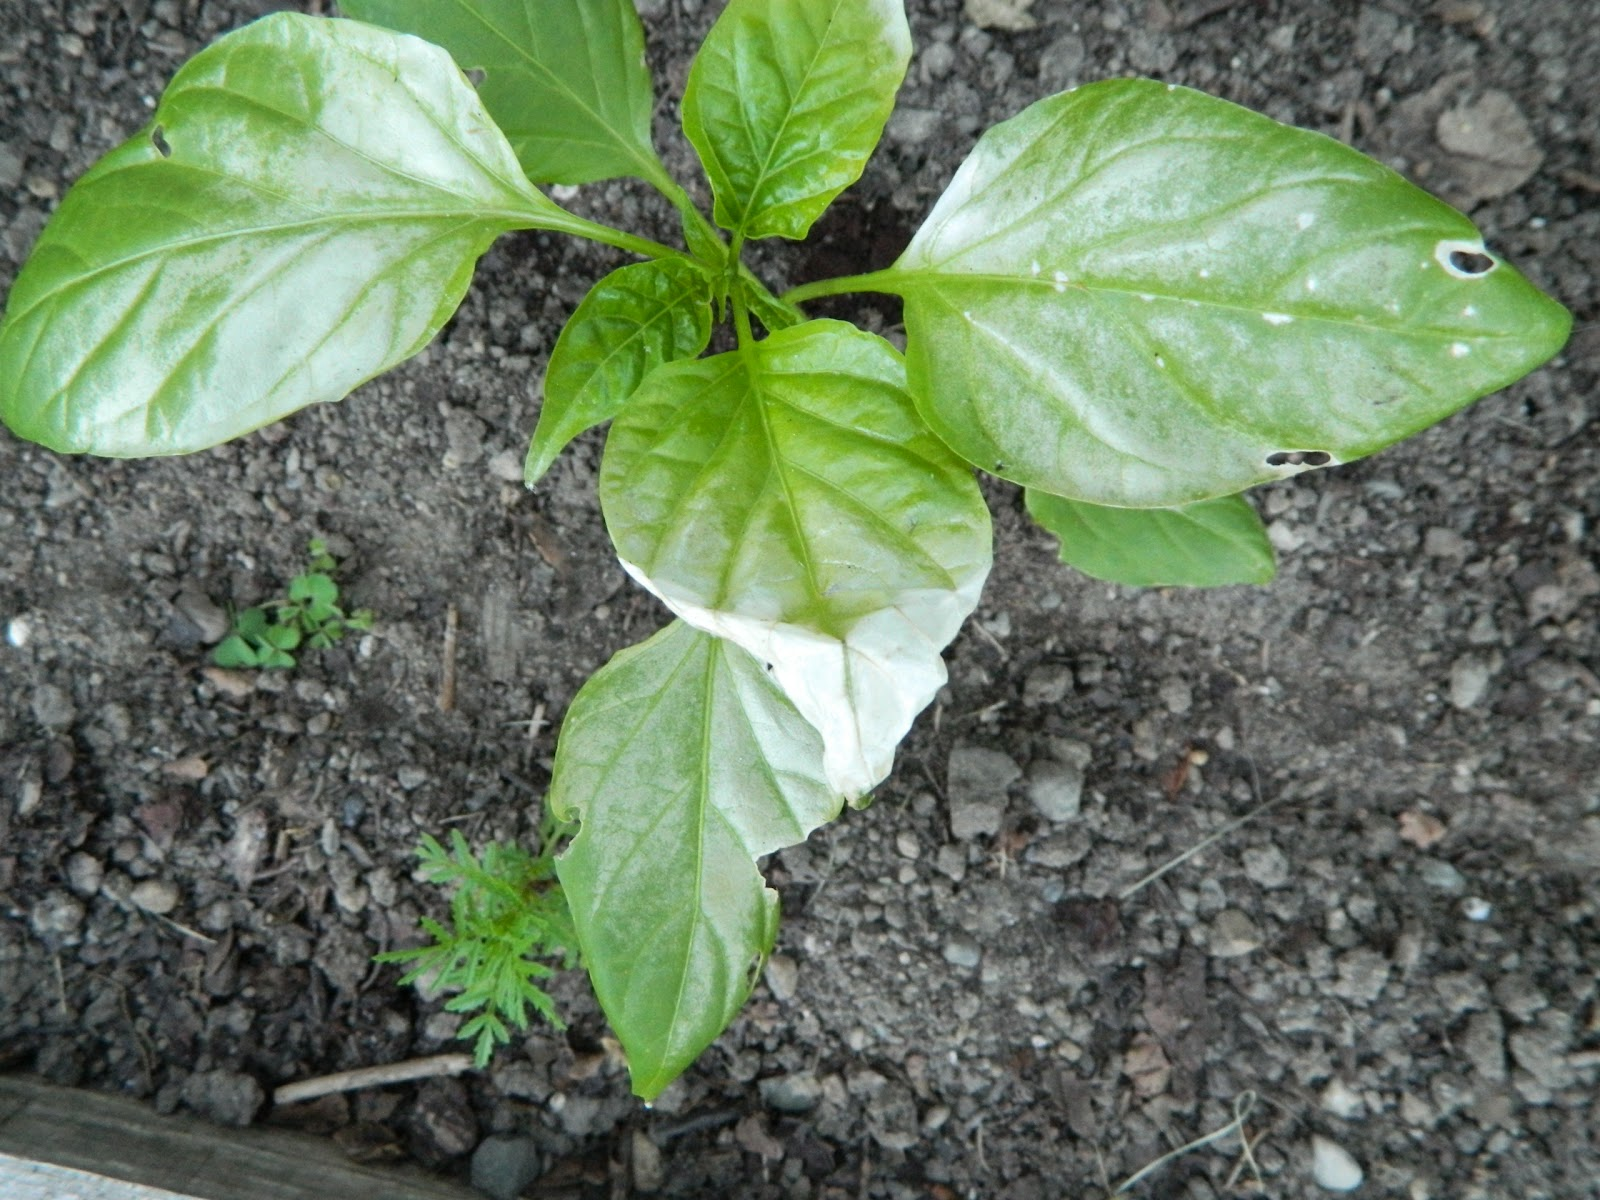

In [10]:
image

In [1]:
from datasets import load_dataset
from transformers import AutoImageProcessor, AutoModelForObjectDetection

ds = load_dataset("susnato/plant_disease_detection_processed")
image_processor = AutoImageProcessor.from_pretrained("susnato/detr-resnet-50_finetuned_plant_disease_detection_processed")
model = AutoModelForObjectDetection.from_pretrained("susnato/detr-resnet-50_finetuned_plant_disease_detection_processed").to("cuda")

2023-11-26 17:25:29.009410: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/56 [00:00<?, ?it/s]

In [4]:
import torch
outputs = model(pixel_values=torch.tensor(ds['train'][0]['pixel_values'], device="cuda")[None])
results = image_processor.post_process_object_detection(outputs, threshold=0.001, target_sizes=[(800, 800, 3, 1)])[0]

tensor([[0.0033, 0.0041, 0.0034, 0.0059, 0.0042, 0.0043, 0.0050, 0.0027, 0.0038,
         0.0043, 0.0069, 0.0036, 0.0054, 0.0032, 0.0038, 0.0028, 0.0037, 0.0031,
         0.0044, 0.0029, 0.0066, 0.0049, 0.0026, 0.0034, 0.0041, 0.0039, 0.0038,
         0.0071, 0.0051, 0.0032, 0.0030, 0.0036, 0.0030, 0.0038, 0.0038, 0.0025,
         0.0044, 0.0032, 0.0036, 0.0033, 0.0037, 0.0043, 0.0063, 0.0049, 0.0032,
         0.0044, 0.0044, 0.0054, 0.0032, 0.0030, 0.0036, 0.0049, 0.0026, 0.0036,
         0.0029, 0.0033, 0.0030, 0.0070, 0.0073, 0.0043, 0.0027, 0.0054, 0.0027,
         0.0030, 0.0029, 0.0023, 0.0030, 0.0032, 0.0017, 0.0028, 0.0026, 0.0041,
         0.0038, 0.0034, 0.0077, 0.0048, 0.0034, 0.0027, 0.0018, 0.0020, 0.0039,
         0.0028, 0.0029, 0.0058, 0.0024, 0.0047, 0.0033, 0.0039, 0.0032, 0.0066,
         0.0053, 0.0052, 0.0077, 0.0050, 0.0038, 0.0061, 0.0031, 0.0063, 0.0041,
         0.0047]], device='cuda:0', grad_fn=<MaxBackward0>)


In [5]:
results

{'scores': tensor([0.0033, 0.0041, 0.0034, 0.0059, 0.0042, 0.0043, 0.0050, 0.0027, 0.0038,
         0.0043, 0.0069, 0.0036, 0.0054, 0.0032, 0.0038, 0.0028, 0.0037, 0.0031,
         0.0044, 0.0029, 0.0066, 0.0049, 0.0026, 0.0034, 0.0041, 0.0039, 0.0038,
         0.0071, 0.0051, 0.0032, 0.0030, 0.0036, 0.0030, 0.0038, 0.0038, 0.0025,
         0.0044, 0.0032, 0.0036, 0.0033, 0.0037, 0.0043, 0.0063, 0.0049, 0.0032,
         0.0044, 0.0044, 0.0054, 0.0032, 0.0030, 0.0036, 0.0049, 0.0026, 0.0036,
         0.0029, 0.0033, 0.0030, 0.0070, 0.0073, 0.0043, 0.0027, 0.0054, 0.0027,
         0.0030, 0.0029, 0.0023, 0.0030, 0.0032, 0.0017, 0.0028, 0.0026, 0.0041,
         0.0038, 0.0034, 0.0077, 0.0048, 0.0034, 0.0027, 0.0018, 0.0020, 0.0039,
         0.0028, 0.0029, 0.0058, 0.0024, 0.0047, 0.0033, 0.0039, 0.0032, 0.0066,
         0.0053, 0.0052, 0.0077, 0.0050, 0.0038, 0.0061, 0.0031, 0.0063, 0.0041,
         0.0047], device='cuda:0', grad_fn=<IndexBackward0>),
 'labels': tensor([10,  9, 17,  9,  9

In [32]:
outputs

DetrObjectDetectionOutput(loss=None, loss_dict=None, logits=tensor([[[-1.4348, -0.4501, -0.6521,  ..., -0.9709, -1.0067,  5.8529],
         [-1.1910, -0.2947, -0.6829,  ..., -0.9079, -0.4279,  5.7711],
         [-1.6047, -0.3406, -0.5027,  ..., -0.8336, -0.7040,  5.7005],
         ...,
         [-1.1694, -0.3344, -0.8705,  ..., -0.7641, -0.5242,  5.2259],
         [-1.8115,  0.1540, -0.7627,  ..., -0.7812, -0.5450,  5.6007],
         [-1.0601, -0.2981, -0.7692,  ..., -0.9452, -0.4153,  5.7382]]],
       device='cuda:0', grad_fn=<ViewBackward0>), pred_boxes=tensor([[[0.1063, 0.5641, 0.1836, 0.3437],
         [0.4750, 0.2972, 0.1475, 0.1993],
         [0.1465, 0.8233, 0.2475, 0.3401],
         [0.4725, 0.1552, 0.2049, 0.1297],
         [0.4505, 0.1522, 0.2617, 0.1794],
         [0.2887, 0.5660, 0.2891, 0.6581],
         [0.5044, 0.4610, 0.1406, 0.2491],
         [0.2388, 0.5393, 0.1891, 0.5539],
         [0.1597, 0.1114, 0.3191, 0.2045],
         [0.1538, 0.1121, 0.3034, 0.2124],
       

In [8]:
for i in range(200):
    print(obj_detector(Image.open(f"./test/{i}.png")))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


KeyboardInterrupt: 

In [ ]:


with torch.no_grad():
    inputs = image_processor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([image.size[::-1]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.5, target_sizes=target_sizes)[0]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

In [84]:
beans = load_dataset("beans")

In [85]:
from transformers import AutoImageProcessor

checkpoint = "google/vit-base-patch16-224"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

In [86]:
from torchvision.transforms import RandomResizedCrop, Compose, Normalize, ToTensor

normalize = Normalize(mean=image_processor.image_mean, std=image_processor.image_std)
size = (
    image_processor.size["shortest_edge"]
    if "shortest_edge" in image_processor.size
    else (image_processor.size["height"], image_processor.size["width"])
)
_transforms = Compose([RandomResizedCrop(size), ToTensor(), normalize])

In [87]:
def transforms(examples):    
    images = [_transforms(image.convert("RGB")) for image in examples['image']]
    labels = [label for label in examples['labels']]

    return {"pixel_values": torch.stack(images), "label": torch.tensor(labels)}

In [88]:
beans = beans.with_transform(transforms)

In [89]:
from transformers import DefaultDataCollator

data_collator = DefaultDataCollator()

In [90]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [2]:
os.environ

environ{'PATH': '/home/susnato/anaconda3/envs/phi/bin:/home/susnato/anaconda3/condabin:/home/susnato/.local/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/snap/bin:/home/susnato/.local/share/JetBrains/Toolbox/scripts',
        'LC_MEASUREMENT': 'en_IN.UTF-8',
        'XAUTHORITY': '/run/user/1000/gdm/Xauthority',
        'INVOCATION_ID': '8c8b0dab9d2c47e78b9a5b6d03d0a70c',
        'XMODIFIERS': '@im=ibus',
        'LC_TELEPHONE': 'en_IN.UTF-8',
        'XDG_DATA_DIRS': '/usr/share/ubuntu:/usr/share/gnome:/home/susnato/.local/share/flatpak/exports/share:/var/lib/flatpak/exports/share:/usr/local/share/:/usr/share/:/var/lib/snapd/desktop',
        'GDMSESSION': 'ubuntu',
        'LC_TIME': 'en_IN.UTF-8',
        'CONDA_DEFAULT_ENV': 'phi',
        'PAPERSIZE': 'a4',
        'GTK_IM_MODULE': 'ibus',
        'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/1000/bus',
        'XDG_CURRENT_DESKTOP': 'ubuntu:GNOME',
        'CONDA_PREFIX

In [1]:
import os
os.environ['LD_LIBRARY_PATH'] = '/home/susnato/anaconda3/envs/phi/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cuda121.so'


from transformers import ViTForImageClassification, TrainingArguments, Trainer

checkpoint = "google/vit-base-patch16-224"
id2label = {i:cls for i, cls in enumerate(beans['train'].features['labels'].names)}
label2id = {v:k for k, v in id2label}

model = ViTForImageClassification.from_pretrained(
    checkpoint,
    torch_dtype=torch.float16,
    num_labels=len(labels),
    id2label=id2label,
    label2id=label2id,
)

2023-11-27 21:09:44.972363: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /home/susnato/anaconda3/envs/phi/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cuda123.so
False
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 8.6
CUDA SETUP: Detected CUDA version 123
CUDA SETUP: Required library version not found: libbitsandbytes_cuda123.so. Maybe you need to compile it from source?
CUDA SETUP: Defaulting to libbitsandbytes_cpu.so...

================================================ERROR=====================================
CUDA SETUP: CUDA detection failed! Possible reasons:
1. CUDA driver not instal

/home/susnato/anaconda3/envs/phi/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /home/susnato/anaconda3/envs/phi did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/home/susnato/anaconda3/envs/phi/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /home/susnato/anaconda3/envs/phi/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cuda121.so did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/home/susnato/anaconda3/envs/phi/lib/python3.9/site-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('@/tmp/.ICE-unix/1318,unix/susnato-desktop'), PosixPath('local/susnato-desktop')}
  warn(msg)
/home/susnato/anaconda3/envs/phi/lib/python3.9/site-packages/bitsandbytes/cuda_setup/mai

RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):

        CUDA Setup failed despite GPU being available. Please run the following command to get more information:

        python -m bitsandbytes

        Inspect the output of the command and see if you can locate CUDA libraries. You might need to add them
        to your LD_LIBRARY_PATH. If you suspect a bug, please take the information from python -m bitsandbytes
        and open an issue at: https://github.com/TimDettmers/bitsandbytes/issues

In [ ]:
training_args = TrainingArguments(
    output_dir="my_awesome_food_model",
    remove_unused_columns=False,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    warmup_ratio=0.1,
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    push_to_hub=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=beans["train"],
    eval_dataset=beans["validation"],
    tokenizer=image_processor,
    compute_metrics=compute_metrics,
)

trainer.train()

In [76]:
beans

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

In [8]:
transforms(beans['train'])[0]#['image']

{'image_file_path': '/home/susnato/.cache/huggingface/datasets/downloads/extracted/38e29d6694476ac890e245695ef2a1dad6dc2327c8d4d9fc64a0b8e177b752f4/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'labels': 0}

In [14]:
beans['train'].features['labels']

ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)